In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Titanic dataset
df = pd.read_csv("./data/titanic_feats.csv")
df.head()
X = df.drop(columns=["y"])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 10) (179, 10) (712,) (179,)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

models = {
    "logis": LogisticRegression(C=10,solver="lbfgs"),
    "logis-2": LogisticRegression(C=1,solver="lbfgs"),
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=100),
}

# Train all the models in the models dict
for name,m in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")

Training logis...
Training logis-2...
Training svm-linear...
Training svm-rbf...


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Convergen

Training randomforest...
Train complete


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    printMetric("Precision",precision_score(y_test, y_pred))
    printMetric("Recall",recall_score(y_test, y_pred))
    printMetric("F1Score",f1_score(y_test, y_pred))

print("Train complete")

Evaluating model logis
	 Accuracy: 0.844
	 Precision: 0.833
	 Recall: 0.812
	 F1Score: 0.823
Evaluating model logis-2
	 Accuracy: 0.844
	 Precision: 0.833
	 Recall: 0.812
	 F1Score: 0.823
Evaluating model svm-linear
	 Accuracy: 0.793
	 Precision: 0.803
	 Recall: 0.712
	 F1Score: 0.755
Evaluating model svm-rbf
	 Accuracy: 0.553
	 Precision: 0.0
	 Recall: 0.0
	 F1Score: 0.0
Evaluating model randomforest
	 Accuracy: 0.832
	 Precision: 0.829
	 Recall: 0.788
	 F1Score: 0.808
Train complete


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


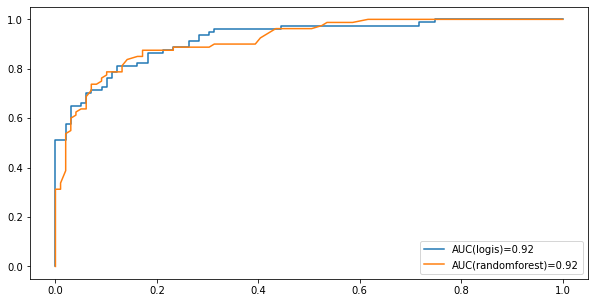

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

analyzeModels = {
    name:model for name, model in models.items() if name in ["logis","randomforest"]
}

plt.figure(figsize=(10,5))
aucs = []
for name, model in analyzeModels.items():
    y_scores = model.predict_proba(X_test)
    #print(y_scores)
    alive_scores = y_scores[:,1]
    
    # Extract AUC score
    auc = roc_auc_score(y_test, alive_scores)
    aucs.append(f"AUC({name})={round(auc,2)}")
    
    # Extract ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, alive_scores, pos_label=1)
    plt.plot(fpr,tpr)

plt.legend(aucs)

In [16]:

import numpy as np
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f"({name}) acccuracy={np.mean(scores)}")

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

(logis) acccuracy=0.7923470661672909


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

(logis-2) acccuracy=0.793458177278402


/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

(svm-linear) acccuracy=0.7047066167290886
(svm-rbf) acccuracy=0.616167290886392
(randomforest) acccuracy=0.8047315855181024


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score# Precision, Recall, F1-Score & Support

print(classification_report(y_test,y_pred))

# Accuracy Score -> in mutliclass is computed with jaccard_score
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        99
           1       0.83      0.79      0.81        80

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

0.8324022346368715


(1797, 64) (1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


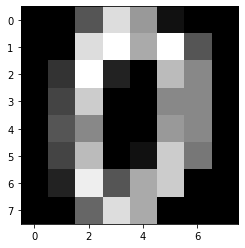

In [23]:
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Mnist dataset
digits = datasets.load_digits()

X = digits["data"]
y = digits["target"]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y[:20])
plt.imshow(X[0].reshape((8,8)),cmap="gray")



In [34]:

model = CalibratedClassifierCV(svm.SVC(gamma=0.001),cv=5)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        39
           5       1.00      0.97      0.99        37
           6       1.00      0.97      0.98        30
           7       0.98      1.00      0.99        40
           8       0.97      0.97      0.97        32
           9       0.98      0.98      0.98        43

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



[[32  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 29  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  1  0 42]]


Text(33.0, 0.5, 'GT')

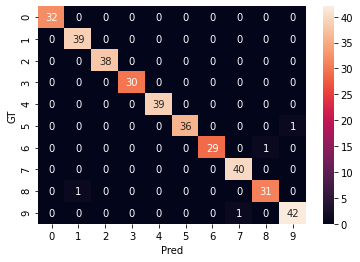

In [35]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

#print(y_test)
#print(y_pred)

cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)
plt.xlabel("Pred")
plt.ylabel("GT")

0    32
1    39
2    38
3    30
4    39
5    37
6    30
7    40
8    32
9    43
dtype: int64


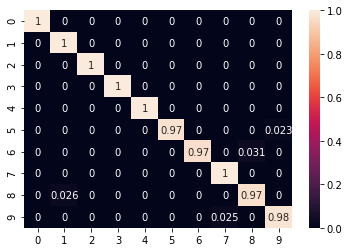

In [36]:
cm = confusion_matrix(y_test,y_pred)
totals_per_class = pd.Series(y_test).value_counts().sort_index()
print(totals_per_class)
cm_percent = cm/totals_per_class[None,:]
sns.heatmap(cm_percent,annot=True)